In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

In [2]:
np.random.seed(0)

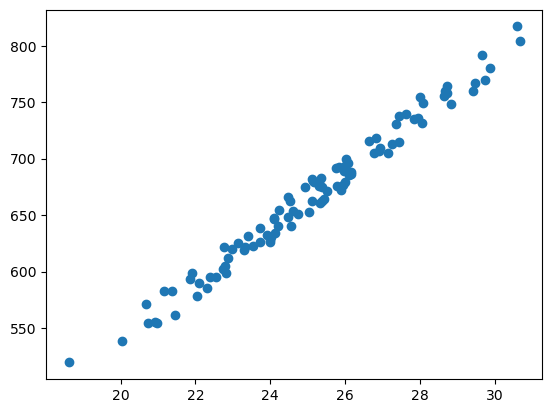

In [3]:
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20, 50, size=len(area))

data = np.array([area, price])
data = pd.DataFrame(data=data.T, columns=['area', 'price'])

plt.scatter(data['area'], data['price'])
plt.show()

In [4]:
data = (data - data.min()) / (data.max() - data.min())

In [5]:
model = K.Sequential([
    Dense(1, input_shape=[1,], activation=None)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2023-01-11 10:15:15.063948: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 10:15:15.064295: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [7]:
model.fit(x=data['area'], y=data['price'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 40ms/step - loss: 0.0565 - val_loss: 0.0606
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0493 - val_loss: 0.0530
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0433 - val_loss: 0.0470
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0383 - val_loss: 0.0416
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0340 - val_loss: 0.0370
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0303 - val_loss: 0.0329
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0271 - val_loss: 0.0294
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0243 - val_loss: 0.0264
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0220 - val_loss: 0.0237
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0199 - val_loss: 0.0215
Epoch 11/100
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 85/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 86/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 0.0047
Epoch 87/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 0.0047
Epoch 88/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 0.0047
Epoch 89/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 90/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 91/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 92/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 93/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 94/100
3/3 [=============

In [8]:
y_pred = model.predict(data['area'])

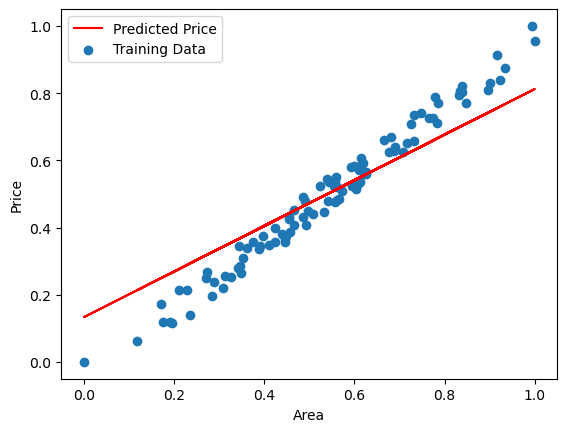

In [9]:
plt.plot(data['area'], y_pred, color='red', label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [10]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.67901736]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.13330792], dtype=float32)>]